<center><img src="img/Sante-publique-France-logo.svg.png" style="width: 500px;"/></center>

**Application au service de la santé publique : Nettoyage des données**


**Contexte :**

L'agence **Santé publique France** a lancé un appel à projets pour trouver des idées innovantes d’applications en lien avec l'alimentation. Pour y participer, il nous faut proposer une idée d’application.

**Les données :**

Nous utiliserons les données de **Open Food Fact** disponiblent à l'adresse suivante : [openfoodfacts.csv](https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-scientist/P2/fr.openfoodfacts.org.products.csv.zip). Les champs sont séparés en quatre sections :

- Les informations générales sur la fiche du produit : nom, date de modification, etc.
- Un ensemble de tags : catégorie du produit, localisation, origine, etc.
- Les ingrédients composant les produits et leurs additifs éventuels.
- Des informations nutritionnelles : quantité en grammes d’un nutriment pour 100 grammes du produit.

**Principes de l'application :**

L'application que nous voulons développement doit participer à informer le grand public sur les apport nutritionnels des différents aliments que l'on peut rencontrer. Le but est de conseiller et améliorer l'alimentation des français et donc leur santé.

---

# Sommaire

---

# Importation des librairies

In [1]:
import os, sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore')

# Pandas settings
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:.2f}'.format


# plot config
sns.set_theme(
    style = "whitegrid",
    font_scale = 1.2,
    rc = {
        "figure.figsize" : (15,10),
        "axes.titlepad": 20,
        "axes.labelweight": "bold",
        "axes.labelsize": 12,
        "axes.titleweight": "bold",
        "axes.titlesize": 18,
        "axes.titlepad": 20,
        'figure.figsize':(12,6)
    }
)
palette = "GnBu_r"
color = "#539ebb"

Versions :

In [2]:
print('Version des librairies utilisées :')
print('Python   : ' + sys.version)
print('NumPy    : ' + np.version.full_version)
print('Pandas   : ' + pd.__version__)
print('Seaborn  : ' + sns.__version__)

Version des librairies utilisées :
Python   : 3.8.12 (default, Oct 12 2021, 06:23:56) 
[Clang 10.0.0 ]
NumPy    : 1.20.3
Pandas   : 1.4.1
Seaborn  : 0.11.2


Style des tableaux :

In [3]:
%%html
<style>
    table {float:left}
</style>

---

# Importation des données

Les données regroupent des informations sur des produits alimentaires vendus dans le monde.

In [4]:
df_raw_data = pd.read_csv(
    "data/fr.openfoodfacts.org.products.csv",
    encoding='utf8',
    sep="\t",
    low_memory=False
)
df_raw_data.head(1)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000000003087/farine-de-ble-noir-ferme-t-y-r-nao,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:characteristics-to-be-completed, en:categories-to-be-completed, en:brands-completed, en:packaging-to-be-completed, en:quantity-completed, en:product-name-completed, en:photos-to-be-validated, en:photos-uploaded","en:to-be-completed,en:nutrition-facts-to-be-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:characteristics-to-be-completed,en:categories-to-be-completed,en:brands-completed,en:packaging-to-be-completed,en:quantity-completed,en:product-name-completed,en:photos-to-be-validated,en:photos-uploaded","A compléter,Informations nutritionnelles à compléter,Ingrédients à compléter,Date limite à compléter,Caractéristiques à compléter,Catégories à compléter,Marques complétées,Emballage à compléter,Quantité complétée,Nom du produit complete,Photos à valider,Photos envoyées",NaN,

## Description des données

## Vue globale des données

In [5]:
df_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


In [6]:
print("")
print("----------------------------------")
print("{} entrées et {} variables.".format(df_raw_data.shape[0],df_raw_data.shape[1]))
print("{} Code référencés.".format(len(df_raw_data['code'].unique())))
print("{} Nons de produits référencés.".format(len(df_raw_data['product_name'].unique())))

duplicates = df_raw_data.duplicated(subset=["code","product_name"], keep='first')
if duplicates.any():
    print("Présence de données dupliquées.")
else:
    print("Absence de données dupliquées.")
print("")


----------------------------------
320772 entrées et 162 variables.
320750 Code référencés.
221348 Nons de produits référencés.
Présence de données dupliquées.



## Les variables

In [7]:
print(*df_raw_data.columns, sep = "\n")

code
url
creator
created_t
created_datetime
last_modified_t
last_modified_datetime
product_name
generic_name
quantity
packaging
packaging_tags
brands
brands_tags
categories
categories_tags
categories_fr
origins
origins_tags
manufacturing_places
manufacturing_places_tags
labels
labels_tags
labels_fr
emb_codes
emb_codes_tags
first_packaging_code_geo
cities
cities_tags
purchase_places
stores
countries
countries_tags
countries_fr
ingredients_text
allergens
allergens_fr
traces
traces_tags
traces_fr
serving_size
no_nutriments
additives_n
additives
additives_tags
additives_fr
ingredients_from_palm_oil_n
ingredients_from_palm_oil
ingredients_from_palm_oil_tags
ingredients_that_may_be_from_palm_oil_n
ingredients_that_may_be_from_palm_oil
ingredients_that_may_be_from_palm_oil_tags
nutrition_grade_uk
nutrition_grade_fr
pnns_groups_1
pnns_groups_2
states
states_tags
states_fr
main_category
main_category_fr
image_url
image_small_url
energy_100g
energy-from-fat_100g
fat_100g
saturated-fat_100g
butyr

> Nous avons dans les données des informations sur :
> - Les pays de disponibilité des produits
> - Les composition des produits
> - Les apports caloriques, ...

In [8]:
df_raw_data.describe()

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.00,248939.00,248939.00,0.00,248939.00,0.00,0.00,261113.00,857.00,243891.00,229554.00,0.00,0.00,1.00,2.00,4.00,1.00,1.00,1.00,24.00,23.00,0.00,0.00,1.00,0.00,22823.00,22859.00,841.00,186.00,38.00,78.00,188.00,149.00,8.00,24.00,23.00,21.00,13.00,0.00,14.00,0.00,0.00,0.00,143298.00,144090.00,243588.00,244971.00,72.00,26.00,38.00,262.00,4.00,11.00,266.00,414.00,200886.00,259922.00,27.00,16.00,9.00,255510.00,255463.00,4133.00,137554.00,34.00,7057.00,1340.00,918.00,140867.00,11154.00,10815.00,11729.00,6784.00,5240.00,3042.00,5300.00,330.00,2483.00,38.00,81.00,24748.00,158.00,141050.00,5845.00,140462.00,6253.00,3929.00,2106.00,1620.00,79.00,1168.00,20.00,11.00,259.00,78.00,29.00,49.00,3036.00,165.00,948.00,0.00,268.00,221210.00,221210.00,0.00,0.00
mean,NaN,1.94,0.02,NaN,0.06,NaN,NaN,1141.91,585.50,12.73,5.13,NaN,NaN,7.40,6.04,36.14,18.90,8.10,3.00,10.75,10.67,NaN,NaN,61.00,NaN,10.43,6.31,3.18,2.25,3.19,1.64,16.23,3.82,0.06,0.15,0.06,40.19,25.12,NaN,0.00,NaN,NaN,NaN,0.07,0.02,32.07,16.00,11.84,2.88,25.90,6.35,24.33,12.16,31.92,49.79,2.86,7.08,4.66,2.51,0.02,2.03,0.80,7.84,0.00,0.52,0.00,0.06,0.03,0.02,0.33,0.26,0.02,0.02,0.01,0.21,0.00,0.12,0.07,0.01,0.12,0.42,0.09,0.13,0.62,0.00,0.53,0.01,0.03,0.00,0.01,0.00,0.00,0.00,0.00,1.59,0.15,6.43,31.46,15.41,49.55,NaN,341.70,9.17,9.06,NaN,NaN
std,NaN,2.50,0.14,NaN,0.27,NaN,NaN,6447.15,712.81,17.58,8.01,NaN,NaN,NaN,0.23,24.10,NaN,NaN,NaN,4.02,3.38,NaN,NaN,NaN,NaN,17.08,10.83,5.61,7.97,13.93,1.98,17.51,6.49,0.03,0.03,0.01,25.18,26.01,NaN,0.00,NaN,NaN,NaN,1.54,0.36,29.73,22.33,13.99,6.29,30.02,14.39,17.79,8.37,24.70,33.21,12.87,8.41,2.98,2.19,0.00,128.27,50.50,10.96,0.07,2.56,0.00,0.69,1.03,2.24,2.47,1.28,0.34,1.21,0.34,5.13,0.01,0.74,1.48,0.04,0.19,12.53,0.15,3.32,12.06,0.21,13.50,0.08,0.91,0.03,0.07,0.10,0.01,0.00,0.00,6.48,0.17,2.05,31.97,3.75,18.76,NaN,425.21,9.06,9.18,NaN,NaN
min,NaN,0.00,0.00,NaN,0.00,NaN,NaN,0.00,0.00,0.00,0.00,NaN,NaN,7.40,5.88,0.04,18.90,8.10,3.00,0.06,5.20,NaN,NaN,61.00,NaN,0.00,0.00,0.00,0.00,0.05,0.04,0.05,0.09,0.01,0.10,0.04,1.00,1.08,NaN,0.00,NaN,NaN,NaN,-3.57,0.00,0.00,-17.86,0.00,0.00,0.00,0.00,0.10,1.50,0.00,0.00,-6.70,-800.00,0.92,0.30

> Le dataset présente des valeurs nulles et des données sur tous les pays. Il sera nécessaire de faire un nettoyage des données pour ne garde que les informations pertinentes pour répondre à notre problématique.

# Filtrage des produits vendus en France

Pour notre application, nous allons nous concentrer sur un public français. Afin de réduire la taille des données à traiter, nous allons garder uniquement les produits disponibles en France.

La colonne **countries** regroupes les pays dans lesqueks sont disponibles les produits.

    countries : list of countries where the product is sold

In [9]:
df_data_fr = df_raw_data[df_raw_data['countries']=="France"]

In [10]:
print("")
print("----------------------------------")
print("{} entrées et {} variables.".format(df_data_fr.shape[0],df_data_fr.shape[1]))
print("{} Pays référencés.".format(len(df_data_fr['countries'].unique())))

duplicates = df_data_fr.duplicated(subset=["code", "product_name"], keep='first')
if duplicates.any():
    print("Présence de données dupliquées.")
else:
    print("Absence de données dupliquées.")
    
duplicates = df_data_fr.duplicated(subset=["product_name"], keep='first')
if duplicates.any():
    print("Présence de données dupliquées.")
else:
    print("Absence de données dupliquées.")

print("")


----------------------------------
77292 entrées et 162 variables.
1 Pays référencés.
Absence de données dupliquées.
Présence de données dupliquées.



> En effectuant cette sélection, nous n'avons plus de données dupliquées et le nombre de produits est réduits. Toutefois, dans le cas d'une mise à jour des données, nous impémentons le traitement des doublons.

# Sélection des variables

## Le Nutri-Score

**Définition :**

Une des varaiables courament utilisé au niveau du grand public est le nutri-grade. Il s'agit d'un logo qui renseigne de façon simplifié sur la qualité nutritionnlle d'un produit. Il est noté de A(meilleur score) à E(moins bon score).

<center><img src="img/declinaison-logo-nutriscore.jpg" style="width: 500px;"/></center>

**Attribution :**

Le score prenant est défini par 2 critères pour 100gr ou 100ml et dépend du calcul du nitri-score :

- en nutriments et aliments à favoriser (fibres, protéines, fruits, légumes, légumineuses, fruits à coques, huile de colza, de noix et d’olive),
- en nutriments à limiter (énergie, acides gras saturés, sucres, sel).

Il nous faudra donc tenir donc de la qualité des produits pour notre application.

In [11]:
df_data_fr['nutrition_grade_fr'].unique()

array([nan, 'd', 'e', 'c', 'b', 'a'], dtype=object)

> On observe qu'il existe des produits avec un nutri-grade non renseignés.

In [12]:
df_data_fr['nutrition_grade_fr'] = df_data_fr['nutrition_grade_fr'].str.upper().apply(str)

## Colonnes pertinentes

*TODO : voir les colones 'created_t' et 'last_modified_t' pour eliminer des doublons ?*

### Suppression des variables vides

In [13]:
df_data_fr.dropna(how='all', axis=1, inplace=True)
print("Nombre de colonnes restantes : {}".format(df_data_fr.shape[1]))

Nombre de colonnes restantes : 136


### Sélection des variables qualitatives

In [14]:
cols_cat_to_keep = [
    'code',
    'image_url',
    'product_name',
    'pnns_groups_1',
    'pnns_groups_2',
    'origins',
    'manufacturing_places',
    'categories',
    'nutrition_grade_fr',
    'additives_n',
    'additives_fr',
    'ingredients_from_palm_oil_n',
]

| Variable | Définition | 
| --- | --- |
| code | Identifiant du produit |
| image_url | Photo ou illustration du produit |
| product_name | Nom du produit |
| pnns_groups_1 | Classement du produit |
| pnns_groups_2 | Sous-classement du produits |
| origins | Origine des ingrédients |
| manufacturing_places | Lieu de fabrication |
| categories | Catégorie du produits |
| nutrition_grade_fr | Nutri-score de A à E |
| additives_n | Nombre d'additifs |
| additives_fr | Liste des additifs |
| ingredients_from_palm_oil_n | Nombre d'ingrédients d'huile de palme |

### Sélection des variables quantitatives

On supprime les colonnes qui ne nous apportent pas d'informations sur les apports nutrionnelles des aliments :

In [15]:
cols_quant_to_keep = df_data_fr.columns[df_data_fr.columns.str.endswith('_100g')]
cols_quant_to_keep.to_list()

['energy_100g',
 'energy-from-fat_100g',
 'fat_100g',
 'saturated-fat_100g',
 'lauric-acid_100g',
 'arachidic-acid_100g',
 'montanic-acid_100g',
 'monounsaturated-fat_100g',
 'polyunsaturated-fat_100g',
 'omega-3-fat_100g',
 'alpha-linolenic-acid_100g',
 'eicosapentaenoic-acid_100g',
 'docosahexaenoic-acid_100g',
 'omega-6-fat_100g',
 'linoleic-acid_100g',
 'arachidonic-acid_100g',
 'gamma-linolenic-acid_100g',
 'omega-9-fat_100g',
 'oleic-acid_100g',
 'trans-fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'sucrose_100g',
 'glucose_100g',
 'fructose_100g',
 'lactose_100g',
 'maltose_100g',
 'maltodextrins_100g',
 'starch_100g',
 'polyols_100g',
 'fiber_100g',
 'proteins_100g',
 'casein_100g',
 'serum-proteins_100g',
 'nucleotides_100g',
 'salt_100g',
 'sodium_100g',
 'alcohol_100g',
 'vitamin-a_100g',
 'beta-carotene_100g',
 'vitamin-d_100g',
 'vitamin-e_100g',
 'vitamin-k_100g',
 'vitamin-c_100g',
 'vitamin-b1_100g',
 'vitamin-b2_100g',
 'vitamin-pp_100g',
 'vi

### Sélection par taux de remplissage

Récupération des colonnes choisies :

In [16]:
all_cols_to_keep = [*cols_cat_to_keep, *cols_quant_to_keep]
df_data_fr = df_data_fr[all_cols_to_keep]

Taux de remplissage :

In [17]:
cols_filling_rate = (df_data_fr.notnull().sum() / len(df_data_fr)).sort_values(ascending=False)

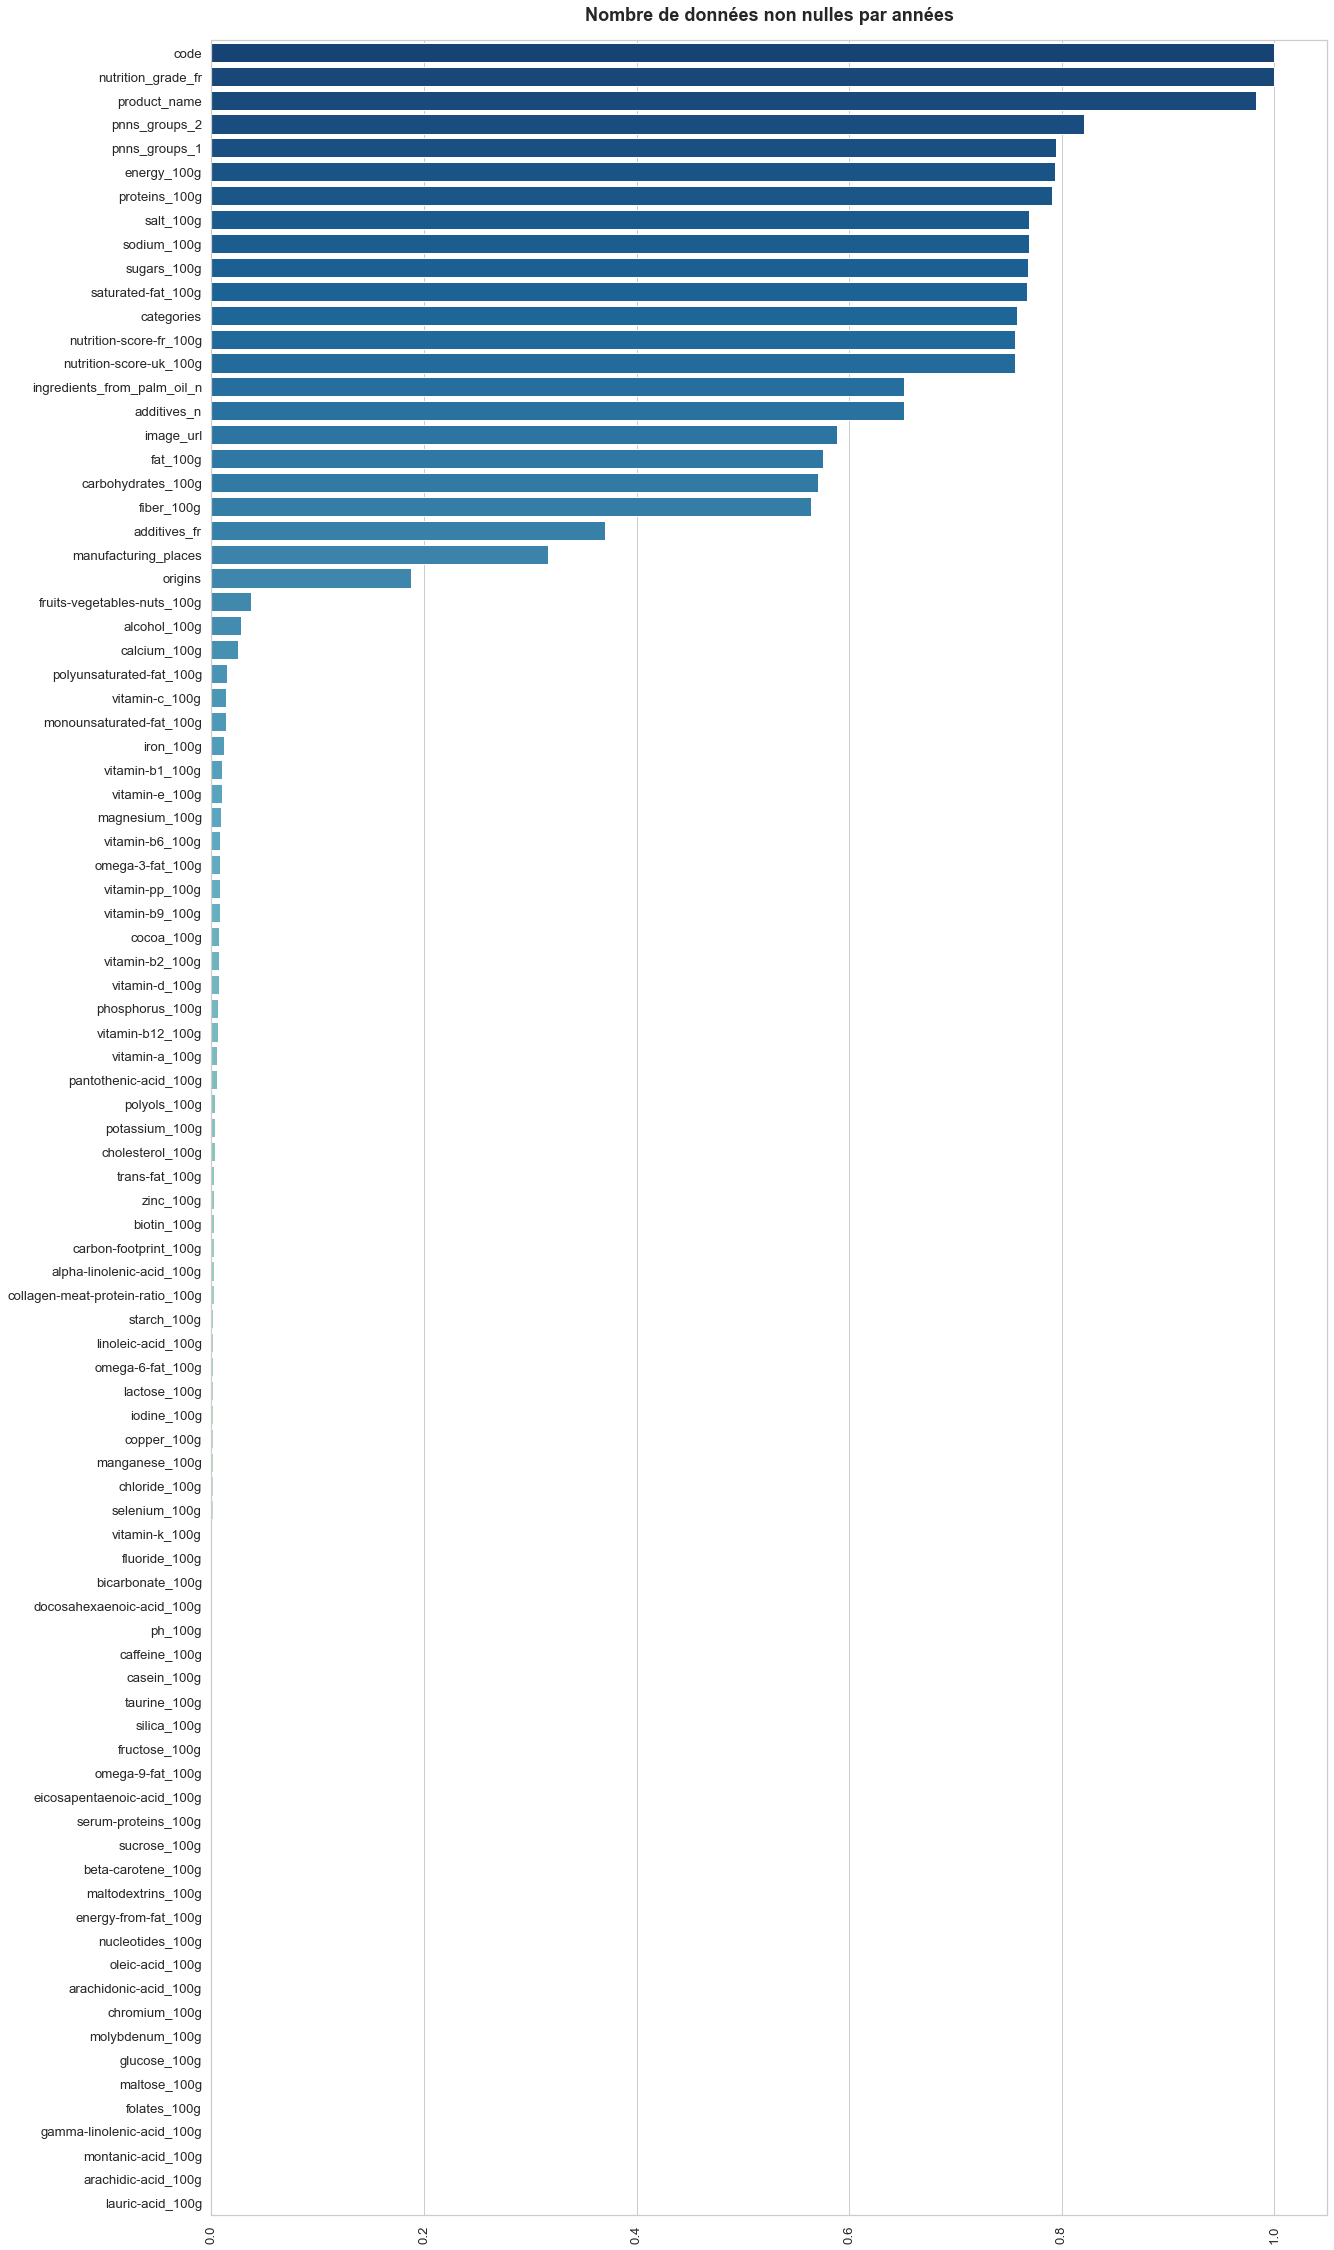

In [18]:
plt.figure(figsize=(20, 40))
ax = sns.barplot(cols_filling_rate.values, cols_filling_rate.index, palette="GnBu_r")
ax.set_title('Nombre de données non nulles par années')
ax.tick_params(axis='x', labelrotation=90)
plt.show()

On garde les colonnes ayant un taux de remplissage suppérieur à 20% :

In [19]:
df_data_fr.drop(columns=cols_filling_rate[cols_filling_rate < 0.20].index, inplace=True)
df_data_fr.drop(columns = "nutrition-score-uk_100g")
df_data_fr.sample(2)

,code,image_url,product_name,pnns_groups_1,pnns_groups_2,manufacturing_places,categories,nutrition_grade_fr,additives_n,additives_fr,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
246341,3596710379866,http://fr.openfoodfacts.org/images/products/359/671/037/9866/front.3.400.jpg,Jambon de Paris fumé,Fish Meat Eggs,Processed meat,NaN,"Viandes,Charcuteries,Jambons,Jambons blancs,Jambons blancs fumés,Jambons de Paris",C,1.00,E250 - Nitrite de sodium,0.00,512.00,3.50,1.30,0.80,0.70,NaN,21.00,1.90,0.75,5.00,5.00
179395,20350888,http://fr.openfoodfacts.org/images/products/20350888/front.6.400.jpg,Filet de saumon sauvage sauce tomate mangue,Fish Meat Eggs,Fish and seafood,NaN,fr:Saumon,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Nettoyage par produits

- Traitement des produits peu renseignés
- Données aberrantes
- Données manquantes (hors nutri-score et nutri-grade)

In [20]:
df_data_fr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77292 entries, 46 to 320765
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   code                         77292 non-null  object 
 1   image_url                    45491 non-null  object 
 2   product_name                 75990 non-null  object 
 3   pnns_groups_1                61451 non-null  object 
 4   pnns_groups_2                63444 non-null  object 
 5   manufacturing_places         24500 non-null  object 
 6   categories                   58580 non-null  object 
 7   nutrition_grade_fr           77292 non-null  object 
 8   additives_n                  50388 non-null  float64
 9   additives_fr                 28612 non-null  object 
 10  ingredients_from_palm_oil_n  50388 non-null  float64
 11  energy_100g                  61347 non-null  float64
 12  fat_100g                     44502 non-null  float64
 13  saturated-fat_

## Suppression des produits sans noms

On supprime les produits sans "nom de produit" renseigné :

In [21]:
print('Nombre de produits sans nom renseigné : {}'.format(len(df_data_fr[df_data_fr['product_name'].isnull()])))
df_data_fr = df_data_fr[df_data_fr['product_name'].notnull()]

Nombre de produits sans nom renseigné : 1302


## Suppression des produits sans indicateurs nutritionnel

In [22]:
# nutrition columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

# filter
df_nutri = df_data_fr.select_dtypes(include=numerics)

In [23]:
df_nutri_cols = df_nutri.columns.tolist()
print(df_nutri_cols)

['additives_n', 'ingredients_from_palm_oil_n', 'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g']


In [24]:
df_nutri_cols.remove('nutrition-score-fr_100g')

In [25]:
df_data_fr.dropna(subset=df_nutri_cols, how='all',inplace=True)
df_data_fr.shape

(70348, 22)

# Traitement des valeurs abérantes

In [26]:
df_data_fr.describe()

,additives_n,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,50336.00,50336.00,61031.00,44207.00,59007.00,43793.00,59096.00,43407.00,60781.00,59159.00,59156.00,58127.00,58127.00
mean,1.86,0.07,1167.17,13.28,5.39,27.28,13.23,2.52,7.80,1.16,0.46,8.60,8.29
std,2.57,0.26,13200.87,17.00,8.55,27.31,19.03,4.64,7.93,4.29,1.69,9.02,9.35
min,0.00,0.00,0.00,0.00,0.00,0.00,-0.10,0.00,0.00,0.00,0.00,-15.00,-15.00
25%,0.00,0.00,427.00,1.30,0.30,3.90,1.00,0.00,1.80,0.08,0.03,1.00,0.00
50%,1.00,0.00,1027.00,6.80,1.90,14.00,4.00,1.30,6.00,0.57,0.22,8.00,7.00
75%,3.00,0.00,1638.00,21.00,7.30,52.60,17.00,3.20,11.00,1.25,0.49,15.00,16.00
max,31.00,2.00,3251373.00,380.00,210.00,190.00,105.00,178.00,100.00,211.00,83.00,40.00,36.00


Plusieurs variables présentent des valeurs abérantes dans le dataset. Par exemple, "energy_100g" possède des valeurs excessives (max) ou encore "sugars_100g" des valeurs négatives.

**Colonnes devant être entre 0 et 100 :**

In [27]:
df_nutri_cols_delimited = df_nutri_cols.remove('energy_100g')

## Suppresion des energy abérantes

*??? Idée à voir*

Pour déterminer les valeurs abbérantes en "energy", on se base sur la valeur maximum q'un aliment peut apporter.
- 1g de Glucides = 17 kJ
- 1g de lipide = 38 KJ
- 1g de protéine = 17 kJ
Donc pour 100g d'aliment, la valeurs énergétique est au maximum de 3800 kJ

In [28]:
df_data_fr = df_data_fr[df_data_fr['energy_100g'] < 3800]

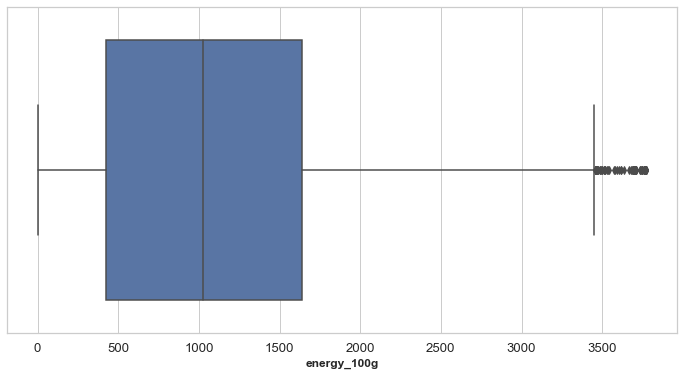

In [29]:
ax = sns.boxplot(x=df_data_fr["energy_100g"])

In [30]:
df_data_fr.shape

(60941, 22)

## Replacement des valeurs nutritionnelles négatives

Nous remplaçons les valeurs négatives par des Nan.

## Suppression des valeurs nutritionnelles suppéreiur à 100

## Cohérence des indicateurs

### Graisse

*graisse saturées > à Graisses ?*

### Sucres

*carbohydrates > à sucre ?*

# Traitement des valeurs manquantes

Nous allons essayer de combler les valeurs manaquantes.

Remplcer les données manquantes par 0, la moyenne ou la médiane

Estimer avec du machine learning KNN ou IterativeImputer (sur les variables corrélées entre elles)

Pour le programme prendre les noms des colonnes en dur

nutri grade manquants à déterminer à l'aide du nutri-score ?